# Image Information

The main objectives of this module are:

* Manipulate an image with Python, scikit-image and numpy.
* Process images at the pixel level.
* Compute and understand image histograms.
* Understand lossless compression & reconstruction.
* Understand the co-occurrence matrix.
* Use different colour representations.

## 1. Read & write an image

In this exercise, we will simply open an image file, display it, and save a copy. 

**Use the [scikit-image io](https://scikit-image.org/docs/dev/api/skimage.io.html) module to open, show & save a copy of the "camera.jpg" image.**

*Note: we use the **%matplotlib inline** command to display the image in the notebook. It would not be necessary if you execute the code in the terminal or in a standard IDE like PyCharm.*

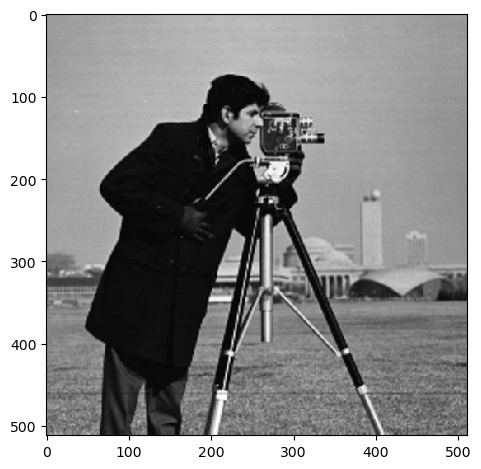

In [104]:
from skimage.io import imread,imsave,imshow
%matplotlib inline

# read the image
camera = imread('camera.jpg')

# display the image
imshow(camera)

# save the image
imsave('camera_copy.jpg', camera)


When you open an image with scikit-image, it is stored as a Numpy [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) object. Numpy arrays are objects which can be easily manipulated for numerical computations.

**Using *ndarray* methods & attributes, answer the following questions about the "camera" image:**

1. What is the shape of the image? (width & height)
1. What is the minimum pixel value? What is the maximum pixel value?
1. What is the data type for each pixel?
1. Show only a 100x100 pixels window taken at the center of the image.

Image shape: (512, 512)
Minimum pixel value: 0
Maximum pixel value: 255
Data type for each pixel: uint8


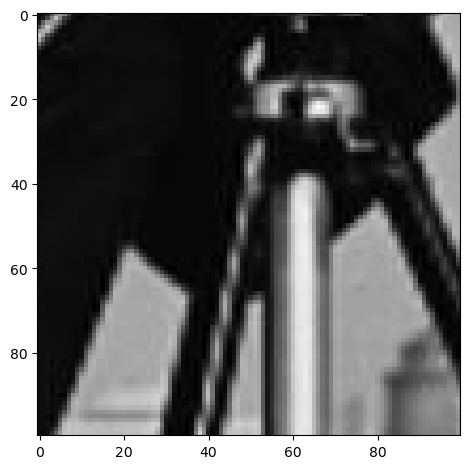

In [105]:
import numpy as np

# 1. What is the shape of the image? (width & height)
print(f"Image shape: {camera.shape}")

# 2. What is the minimum pixel value? What is the maximum pixel value?
print(f"Minimum pixel value: {np.min(camera)}")
print(f"Maximum pixel value: {np.max(camera)}")

# 3. What is the data type for each pixel?
print(f"Data type for each pixel: {camera.dtype}")

# 4. Show only a 100x100 pixels window taken at the center of the image.
center_x, center_y = camera.shape[0] // 2, camera.shape[1] // 2
window_size = 100
window = camera[center_x - window_size//2:center_x + window_size//2, center_y - window_size//2:center_y + window_size//2]
imshow(window)


**Need more help? You can check the following videos:**

* [Image I/O](https://www.youtube.com/watch?v=rgJmji4rTpw&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=1)
* [Image data type & color channels](https://www.youtube.com/watch?v=rIO1EJ--yeg&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=2)

## 2. Image histograms

* Compute and plot the **histogram** and the **normalized histogram** of the example cameraman image given below.

You can use the [pyplot module](https://matplotlib.org/api/pyplot_api.html) from matplotlib to display plots & histograms.

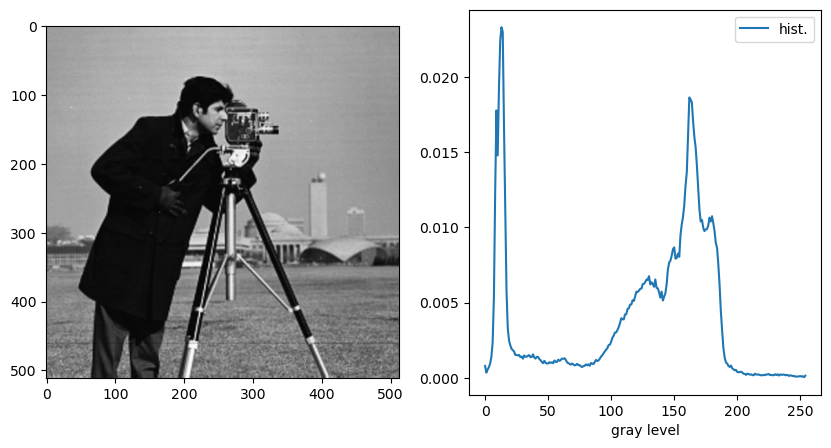

In [106]:
from matplotlib import pyplot as plt

def norm_hist(ima):
    hist,bins = np.histogram(ima.flatten(),range(256))  # histogram is computed on a 1D distribution --> flatten()
    return 1.*hist/np.sum(hist) # normalized histogram

def display_hist(ima):
    plt.figure(figsize=[10,5])
    if ima.ndim == 2:
        nh = norm_hist(ima)
    else:
        nh_r = norm_hist(ima[:,:,0])
        nh_g = norm_hist(ima[:,:,1])
        nh_b = norm_hist(ima[:,:,2])
    # display the results
    plt.subplot(1,2,1)
    plt.imshow(ima,cmap=plt.cm.gray)
    plt.subplot(1,2,2)
    if ima.ndim == 2:
        plt.plot(nh,label='hist.')
    else:
        plt.plot(nh_r,color='r',label='r')
        plt.plot(nh_g,color='g',label='g')
        plt.plot(nh_b,color='b',label='b')
    plt.legend()
    plt.xlabel('gray level')

display_hist(camera)


Can you use the histogram to answer the following questions ? (you don't need to code anything here)

1. What is the average gray value of the cameraman ?        <span style="color:red">170</span>
1. What is the average gray value of the sky ?              <span style="color:red">20</span>
1. Is there more 'cameraman' pixels than 'sky' pixels ?     <span style="color:red">sky</span>

Compute and plot the **cumulated histogram**.

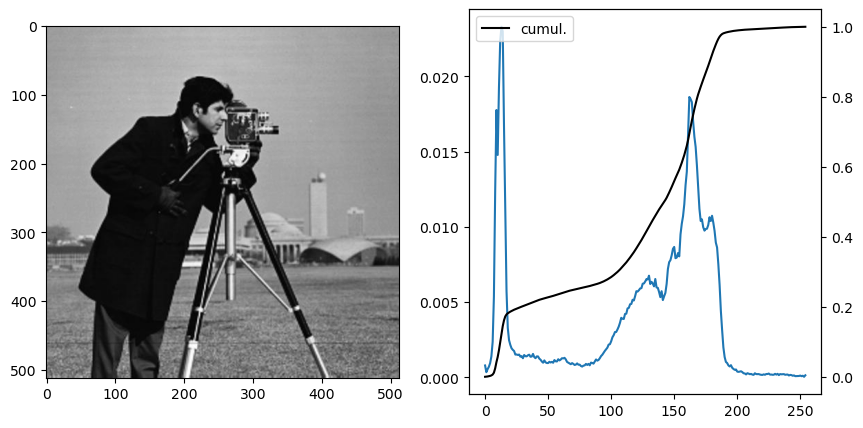

In [107]:
from matplotlib import cm
def cum_hist(im):
    c_hist = [0]*256
    c_hist[0] = (im == 0).sum()
    for x in range(1, 256):
        c_hist[x] = (im == x).sum() + c_hist[x - 1]

    return c_hist


def display_hist2(ima):
    nh = norm_hist(ima)
    cumul_hist = np.cumsum(nh)
    
    plt.figure(figsize=[10,5])
    plt.subplot(1,2,1)
    plt.imshow(ima,cmap=cm.gray)
    ax1 = plt.subplot(1,2,2)
    plt.plot(nh)
    ax2 = ax1.twinx()
    plt.plot(cumul_hist,label='cumul.',color='k')
    plt.legend()


    
display_hist2(camera)


**Need more help? You can check the following videos:**

* [Computing a greyscale histogram](https://www.youtube.com/watch?v=g6hkHQbwB0I&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=3)
* [Numpy arrays: operations, indexing, masking](https://www.youtube.com/watch?v=rPNTkrM2dZw&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=4&t=253s)
* [Normalized and cumulative histograms](https://www.youtube.com/watch?v=uCgu0-KZt1o&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=5)

## 3. Image entropy

The "entropy" of a signal, in information theory, can generally be interpreted as the "number of bits required to encode the signal". It is a measure of the "amount of information" contained in the signal. Intuitively, a signal with a very narrow distribution (all values are close to each other) will have a very low entropy, while a signal with a wide distribution (the values are evenly distributed) will have a higher entropy.

1. Compute the image entropy of the cameraman image. The image entropy is given by $e = - \sum_{g=0}^N p(g) \log_2(p(g))$ where $p(g)$ is the probability that a pixel has the grayscale value g, and N is the number of possible grayscale values. Note that p(g) is directly given by the normalized histogram.
1. What is the entropy of a shuffled version of the cameraman ? <span style="color:red">The same  as the original because it only depends on the grey scale distribution.</span>

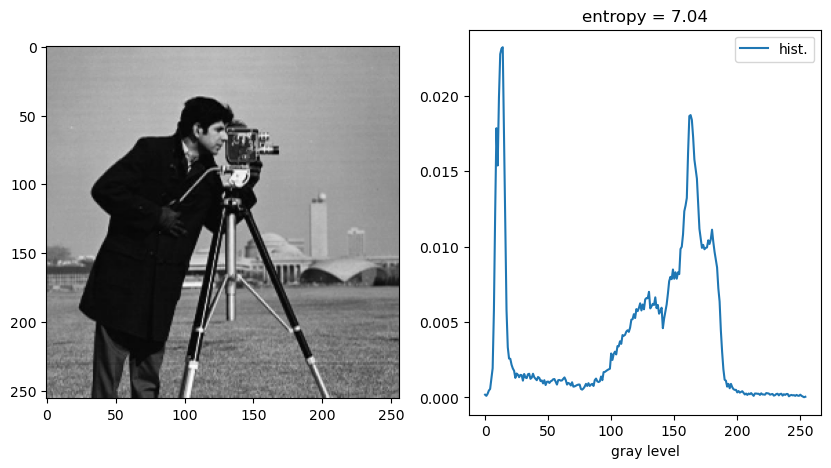

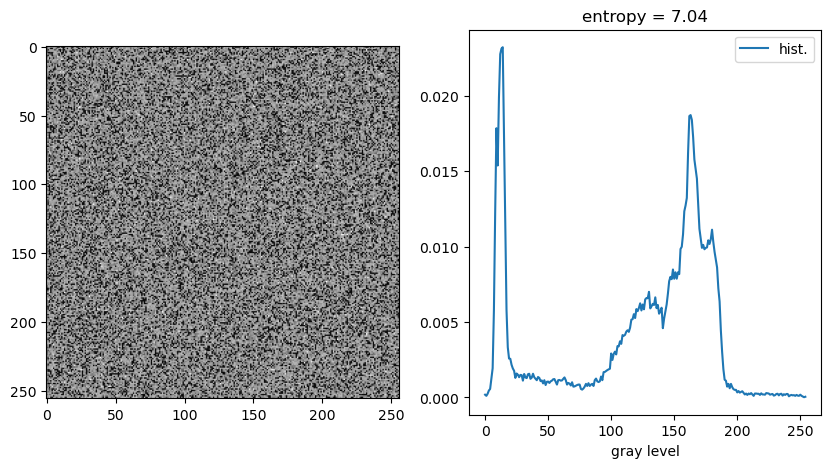

In [108]:
"""def display_hist(ima,nbin):
    hist,bins = np.histogram(ima.flatten(),bins=range(0,nbin+1))
    norm_hist = 1.*hist/np.sum(hist) # normalized histogram
    # entropy
    idx = norm_hist>0
    e = -np.sum(norm_hist[idx]*np.log2(norm_hist[idx]))
    
    # display the results
    plt.figure(figsize=[10,3])
    ax = plt.subplot(1,2,1)
    plt.imshow(ima,cmap=cm.gray,interpolation='nearest')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax = plt.subplot(1,2,2)
    plt.bar(bins[:-1],hist,.8)
    if len(bins)<10:
        ax.set_xticks(bins[:-1])
        ax.set_xticklabels( bins[:-1] )
    plt.xlabel('gray level')
    plt.ylabel('occurence')
    plt.title('entropy = %.2f'%e)"""

def display_hist(ima):
    plt.figure(figsize=[10,5])
    if ima.ndim == 2:
        nh = norm_hist(ima)
    else:
        nh_r = norm_hist(ima[:,:,0])
        nh_g = norm_hist(ima[:,:,1])
        nh_b = norm_hist(ima[:,:,2])
    # display the results
    plt.subplot(1,2,1)
    plt.imshow(ima,cmap=plt.cm.gray)
    plt.subplot(1,2,2)
    if ima.ndim == 2:
        plt.plot(nh,label='hist.')
    else:
        plt.plot(nh_r,color='r',label='r')
        plt.plot(nh_g,color='g',label='g')
        plt.plot(nh_b,color='b',label='b')
    plt.legend()
    plt.xlabel('gray level')
    e = entropy(ima)
    plt.title('entropy = %.2f'%e)

def entropy(ima):
    proba = norm_hist(ima)
    e = 0
    for n in range(255):
        if proba[n]>0:
            e -= proba[n]*np.log2(proba[n])
    return e

ima = camera[::2,::2]
display_hist(ima)

# randomly permutes all the image pixels
d = ima.flatten()
shuffled_ima = np.random.permutation(d.flatten())
shuffled_ima = shuffled_ima.reshape(ima.shape)

display_hist(shuffled_ima)


**Need more help? You can check the following videos:**

* [Computing the image entropy](https://www.youtube.com/watch?v=L2VtGt2FsRQ&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=6)

## 4. Image compression

Using the code below as a starting point:

* **Decompose an image** by recursively subsampling its dimensions and computing the remainders, such that each level of recursion performs the following operation:

<img src='PyramidCompression.png' width='75%'/>

Image entropy : 7.065382928727903
Pyramid entropy : 3.346722744534718


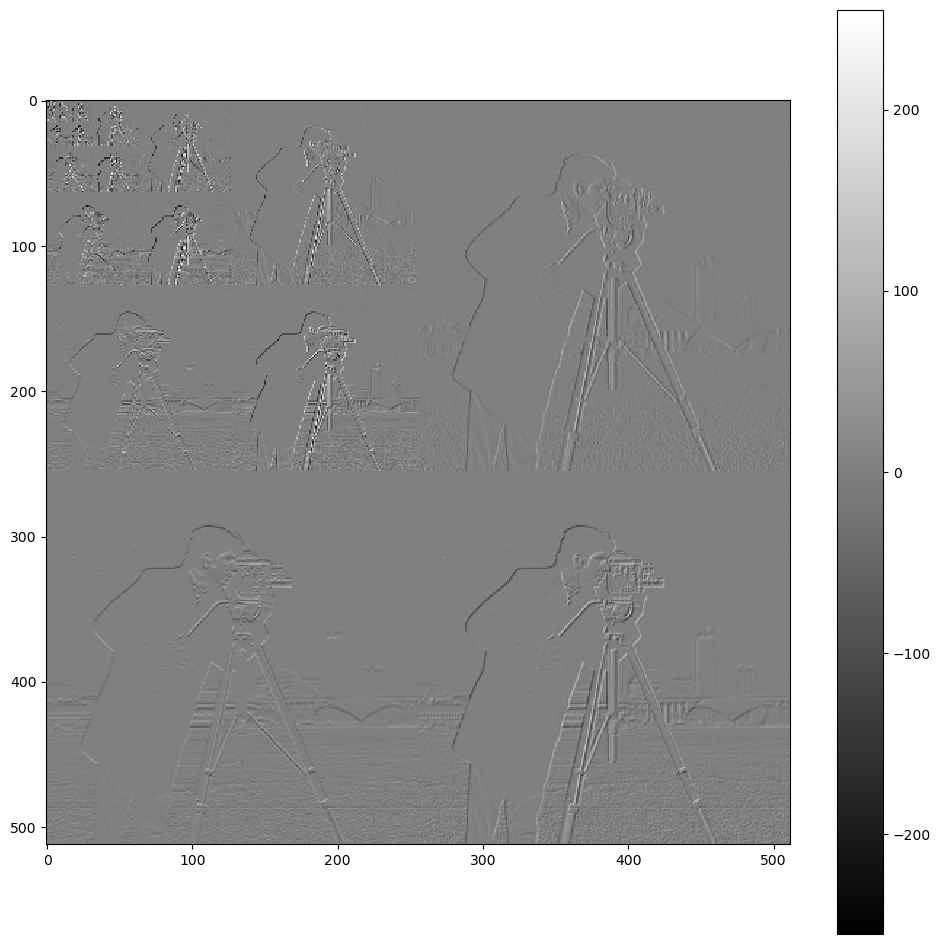

In [109]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.io import imread

image = imread("camera.jpg").astype(np.int16)

# Modify this method:
def split(im):
    if im.shape[0] > 1:
        a = im[0:-1:2,0:-1:2]
        b = im[0:-1:2,1::2]-a
        c = im[1::2,0:-1:2]-a
        d = im[1::2,1::2]-a
        R = np.vstack((np.hstack((split(a),b)),np.hstack((c,d))))
    else:
        R = im
    return R


s = split(image)
print("Image entropy :", entropy(image))
print("Pyramid entropy :", entropy(s))

plt.figure(figsize=(12,12))
plt.imshow(s,interpolation='nearest',cmap=cm.gray,vmin=-255, vmax=255)
plt.colorbar()
plt.show()

**Compute how the image entropy evolves** with regards to the level of decomposition

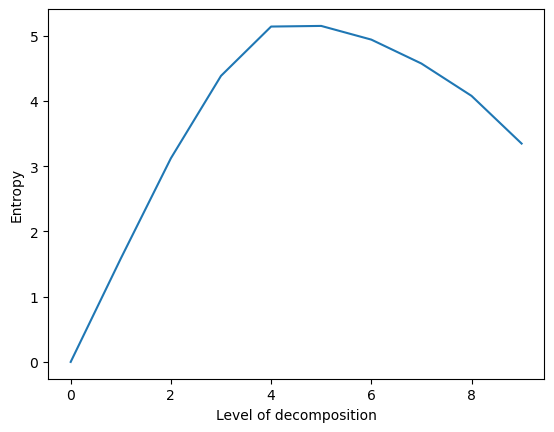

In [110]:
def split(im, entropy_list):
    if im.shape[0] > 1:
        a = im[0:-1:2,0:-1:2]
        b = im[0:-1:2,1::2]-a
        c = im[1::2,0:-1:2]-a
        d = im[1::2,1::2]-a
        R = np.vstack((np.hstack((split(a,entropy_list),b)),np.hstack((c,d))))
    else:
        R = im

    entropy_list.append(entropy(R))
    return R

image1 = imread("camera.jpg").astype(np.int16)


entropy_list1 = []
pyramid1 = split(image1, entropy_list1)

plt.figure()
plt.xlabel('Level of decomposition')
plt.ylabel('Entropy')
plt.plot(entropy_list1)
plt.show()

**Rebuild the original image** from the pyramid (allowing the selection the level of recursion)

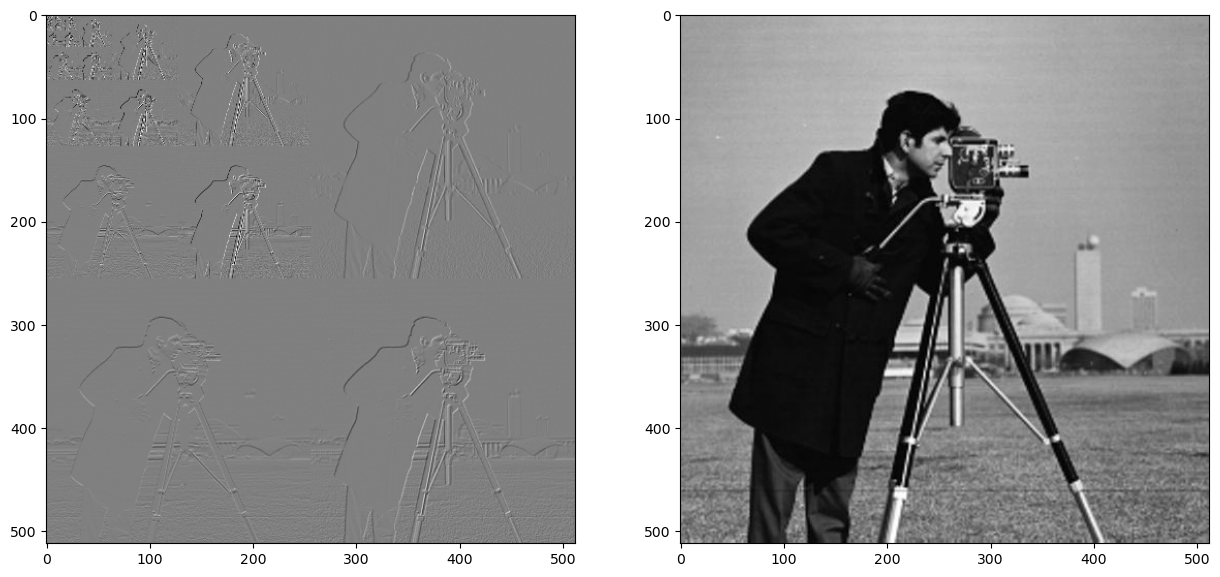

Image entropy : 7.065382928727903
Pyramid entropy : 3.346722744534718
Rebuilt image entropy : 7.065382928727903


In [111]:
def rebuild(im):
    if im.shape[0] % 2 != 0 or im.shape[1] % 2 != 0:
        return im
    else:
        midx = im.shape[0] // 2
        midy = im.shape[1] // 2

        a = rebuild(im[:midx,:midy])
        b = im[:midx,midy:]
        c = im[midx:,:midy]
        d = im[midx:,midy:]

        im_prim = im.copy()
        im_prim[::2,::2] = a
        im_prim[::2,1::2] = a + b 
        im_prim[1::2,::2] = a + c
        im_prim[1::2,1::2] = a + d

        return im_prim
    
def compare(im1, im2, opt1=plt.cm.gray, opt2=plt.cm.gray):
    plt.figure(figsize=[15,8])
    plt.subplot(1,2,1)
    plt.imshow(im1, cmap=opt1)
    plt.subplot(1,2,2)
    plt.imshow(im2, cmap=opt2)
    plt.show()

compare(pyramid1, rebuild(pyramid1))
print("Image entropy :", entropy(image1))
print("Pyramid entropy :", entropy(pyramid1))
print("Rebuilt image entropy :", entropy(rebuild(pyramid1)))



**Need more help? You can check the following videos:**

* [Subsampling and rescaling](https://www.youtube.com/watch?v=rYNUby5bIlA&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=7)
* [Pyramid compression](https://www.youtube.com/watch?v=yrsyF8T5OAU&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=8)

## 5. Co-occurrence matrix

While the histogram of an image is independent of the position of the pixels, the co-occurrence matrix gives us information about their spatial distribution.

A co-occurrence matrix is computed for a given displacement, looking at the pair of values spatially separated by that displacement. The co-occurrence matrix is a square matrix, its size given by the number of possible values that a pixels can take in the image.

1. Compute de [cooccurrence matrix](https://en.wikipedia.org/wiki/Co-occurrence_matrix) for a chosen displacement $(\Delta x,\Delta y)$ (see [greycomatrix](http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.greycomatrix) in scikit-image)
1. What is the entropy of the cooccurrence matrix ?
1. How does this entropy evolve if we increase the displacement ?

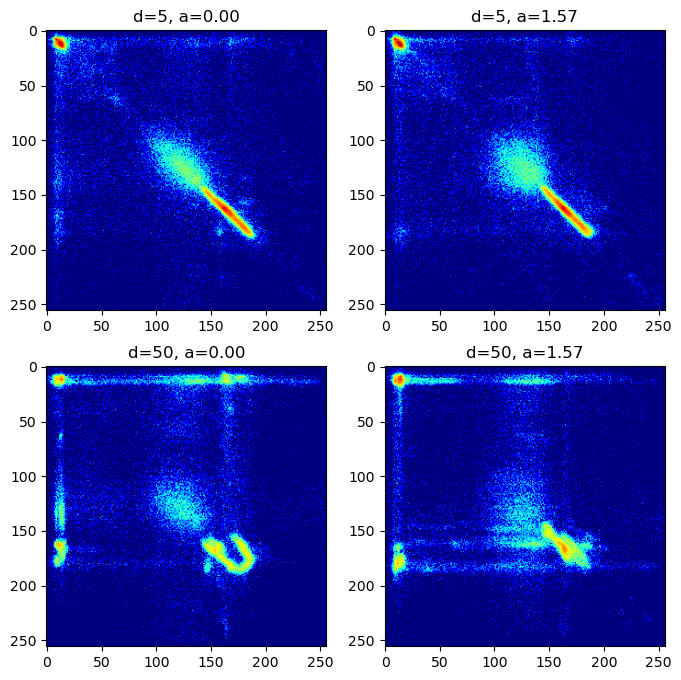

In [112]:
def log_nz(M): #allows to display the log of the matrix, but with a 0.5 value for the 0 values
    M2 = M.copy()
    M2[M==0] = 0.5
    return np.log(M2)


#dy, dx = 0, 5

#c = np.zeros((256,256))
#for y in range(ima.shape[0]-dy):
#    for x in range(ima.shape[1]-dx):
#        i = ima[y,x]
#        j = ima[y+dy,x+dx]
#        c[i,j] += 1

#plt.figure()
#plt.imshow(log_nz(c), plt.cm.jet)
#plt.show()


from skimage.feature import graycomatrix

distances = [5, 50]
angles = [0, np.pi/2]

co_matrices = log_nz(graycomatrix(ima, distances, angles).astype('float'))

plt.figure(figsize=(8,8))
i = 1
for idd,d in enumerate(distances):
    for ida,a in enumerate(angles):
        C = co_matrices[:,:,idd,ida]
        plt.subplot(2,2,i)
        plt.imshow(C, vmin=co_matrices.min(), vmax=co_matrices.max(), cmap=plt.cm.jet)
        plt.title('d=%d, a=%.2f'%(d,a))
        i += 1
plt.show()


**Need more help? You can check the following videos:**

* [Grayscale co-occurence matrix](https://www.youtube.com/watch?v=cq0Br3zB2AU&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=9)

## 6. Colour representations

A colour image is typically encoded with three channels: Red, Green and Blue. In the example below, we open the *immunohistochemistry()* example image and split it into the three channels, which we display: 

1. Compute & show the color histograms
1. Convert the image to the HSV color space & compute the HSV histograms. [See the skimage documentation for reference on color transformation](http://scikit-image.org/docs/dev/api/skimage.color.html#rgb2hsv)
1. Find a method to isolate the brown cells in the immunohistochemistry image
    1. In the RGB space
    1. In the HSV space

(512, 512, 3) uint8


<Figure size 640x480 with 0 Axes>

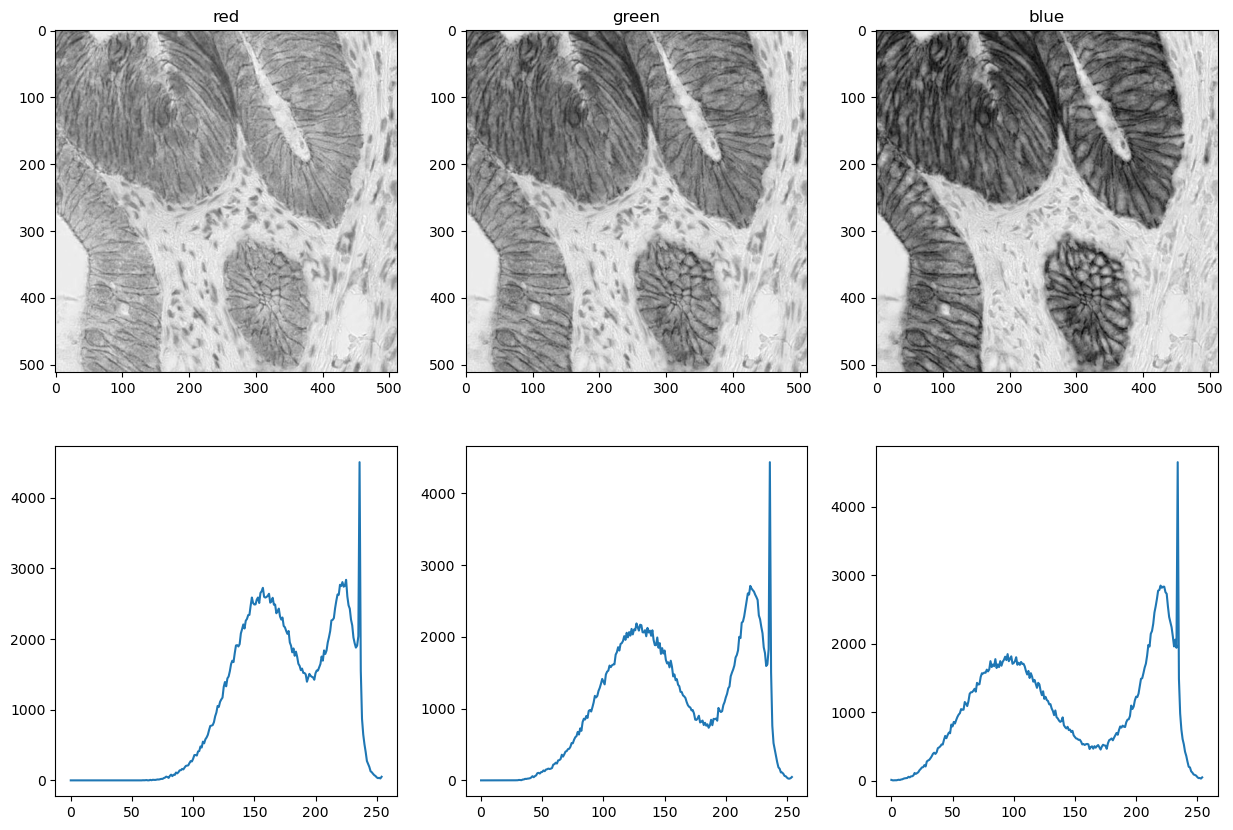

Red channel: [157, 225, 236]
Green channel: [127, 220, 236]
Blue channel: [95, 220, 234]
[[[156 118  81]
  [163 125  88]]

 [[141 105  69]
  [144 108  72]]]


In [113]:
from skimage.data import immunohistochemistry
import numpy as np

im = immunohistochemistry() # scikit-image method to load the example image
print(im.shape,im.dtype)

r = im[:,:,0]
g = im[:,:,1]
b = im[:,:,2]

hist_r,bins_r = np.histogram(r.flatten(),range(256))
hist_g,bins_g = np.histogram(g.flatten(),range(256))
hist_b,bins_b = np.histogram(b.flatten(),range(256))

plt.gray()
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.imshow(r, vmin=0, vmax=255)
plt.title('red')
plt.subplot(2,3,2)
plt.imshow(g, vmin=0, vmax=255)
plt.title('green')
plt.subplot(2,3,3)
plt.imshow(b, vmin=0, vmax=255)
plt.title('blue')
plt.subplot(2,3,4)
plt.plot(hist_r)
plt.subplot(2,3,5)
plt.plot(hist_g)
plt.subplot(2,3,6)
plt.plot(hist_b)
plt.show()

def find_peaks(h):
    peaks = []
    for v in range(10,len(h)-10):
        if( h[v] == h[v-10:v+10].max() and h[v] > 0 ): peaks += [v]
    return peaks

print("Red channel:",find_peaks(hist_r))
print("Green channel:",find_peaks(hist_g))
print("Blue channel:",find_peaks(hist_b))

print(im[:2,:2,:]) # print the 2x2x3 first pixels

The brown that we need in RGB is [157,225,95]

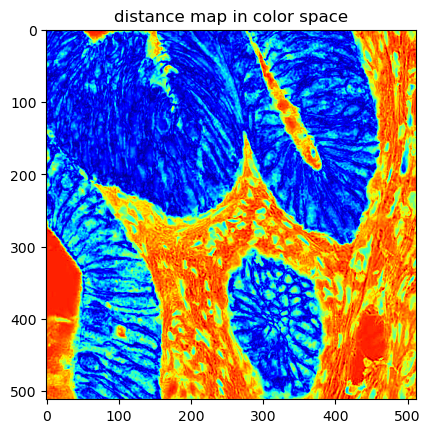

In [114]:
def distance_image_space(im, coords):
    dmap = np.zeros((im.shape[0], im.shape[1]))
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            dmap[i,j] = np.sqrt((i-coords[0])**2 + (j-coords[1])**2)
    return dmap

def distance_color_space(im, coords):
    refcolor = im[coords[0], coords[1]]
    dmap = np.sqrt(((im-refcolor)**2).sum(axis=2))
    return dmap

coords = [2, 2]
dmap = distance_color_space(im.astype('float'), coords)
plt.figure()
plt.imshow(dmap, cmap=plt.cm.jet)
plt.title('distance map in color space')
plt.show()


This represent the distance between the color of a pixel and the reference point (coords).
We took a brown point as reference in coords (2,2). We will now try to find a treshold to select only pixels that are close to brown.

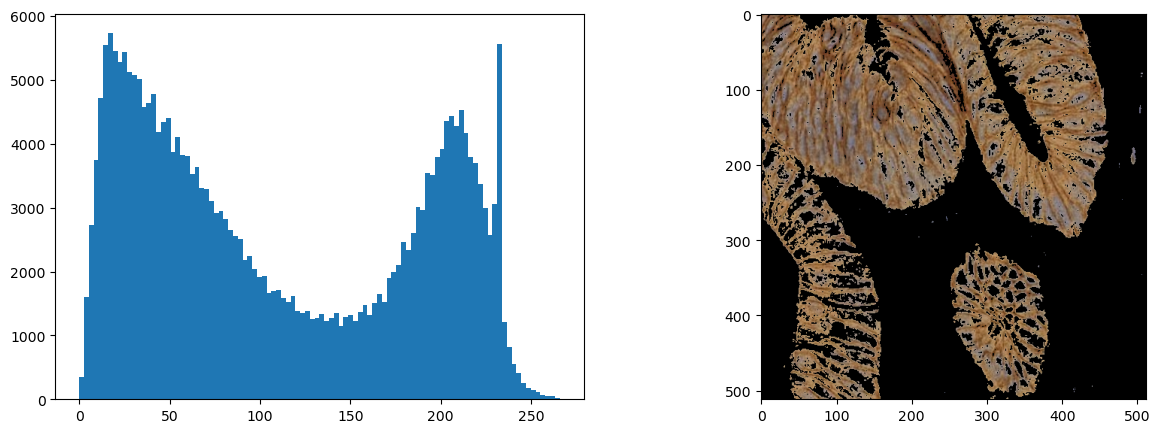

In [115]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(dmap.flatten(), bins=100)
# shows that there is a clear distinction between the background and the foreground
# let's isolate the foreground with a treshold value of 80
mask = dmap < 80
im_m = im.copy()
im_m[mask == False] = 0
plt.subplot(1,2,2)
plt.imshow(im_m)
plt.show()

Let's compute in the HSV space


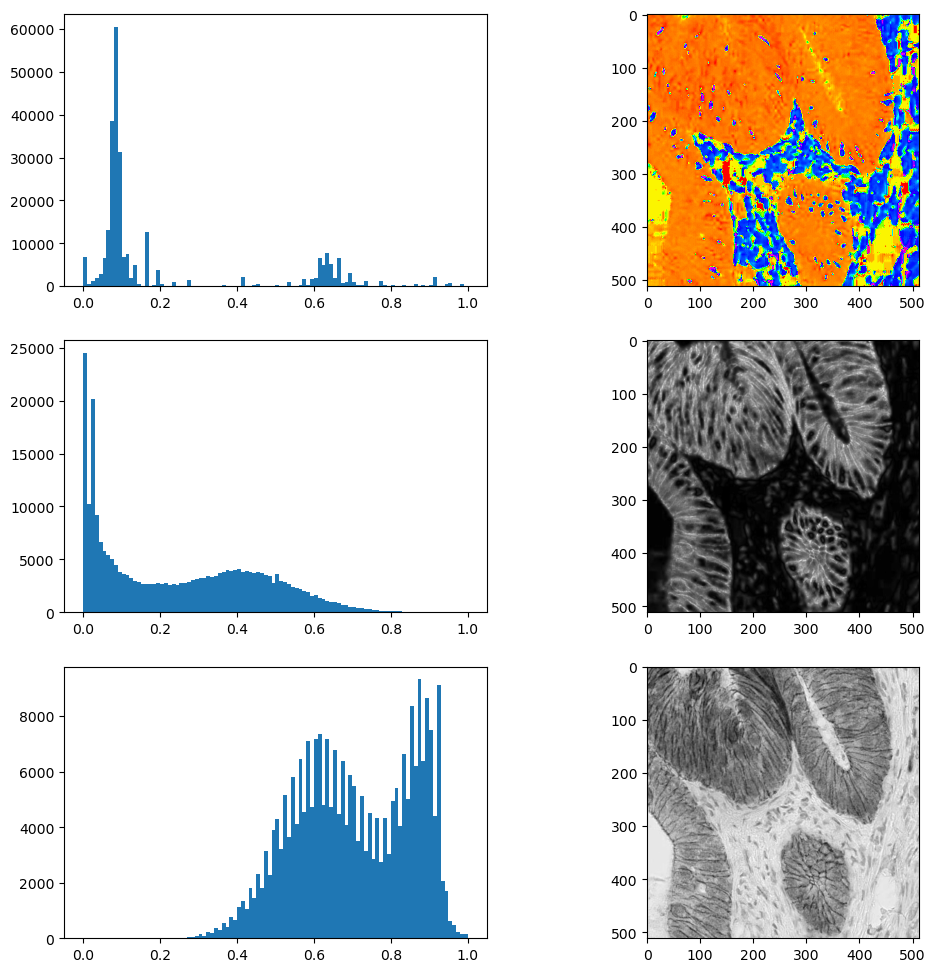

In [116]:
# 2
from skimage.color import rgb2hsv
hsv = rgb2hsv(im)
# print(hsv.shape, hsv.dtype)
plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
plt.hist(hsv[:,:,0].flatten(), bins=np.arange(101)/100)
plt.subplot(3,2,2)
plt.imshow(hsv[:,:,0], plt.cm.hsv)
plt.subplot(3,2,3)
plt.hist(hsv[:,:,1].flatten(), bins=np.arange(101)/100)
plt.subplot(3,2,4)
plt.imshow(hsv[:,:,1], plt.cm.gray)
plt.subplot(3,2,5)
plt.hist(hsv[:,:,2].flatten(), bins=np.arange(101)/100)
plt.subplot(3,2,6)
plt.imshow(hsv[:,:,2], plt.cm.gray)
plt.show()


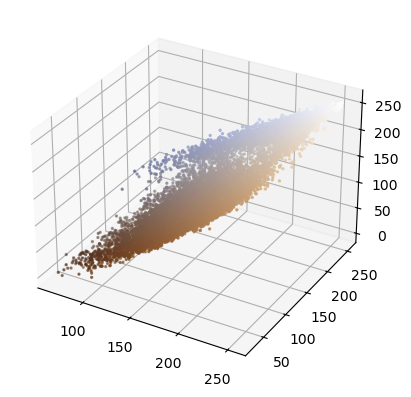

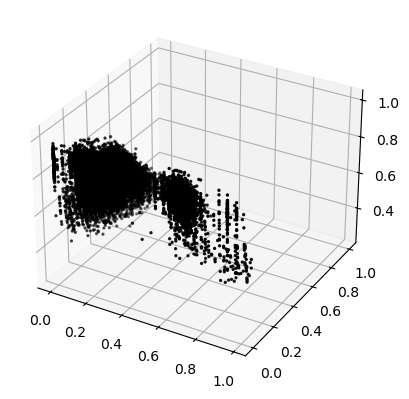

In [117]:
# Color Space

from mpl_toolkits.mplot3d import Axes3D

def scatter3d(coords, colors):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(coords[:,0], coords[:,1], coords[:,2], s=2, c=colors)
    plt.show()

pixels = im.reshape((im.shape[0]*im.shape[1], 3))[::20,:] # take only 1/20th of the pixels to speed up the display
scatter3d(pixels, pixels/255)

pixelshsv = hsv.reshape((hsv.shape[0]*hsv.shape[1], 3))[::20,:] # take only 1/20th of the pixels to speed up the display
scatter3d(pixelshsv, pixelshsv/255)

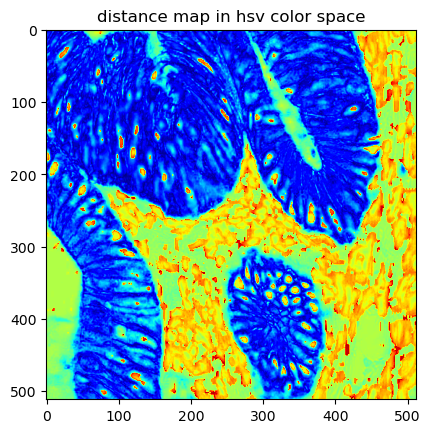

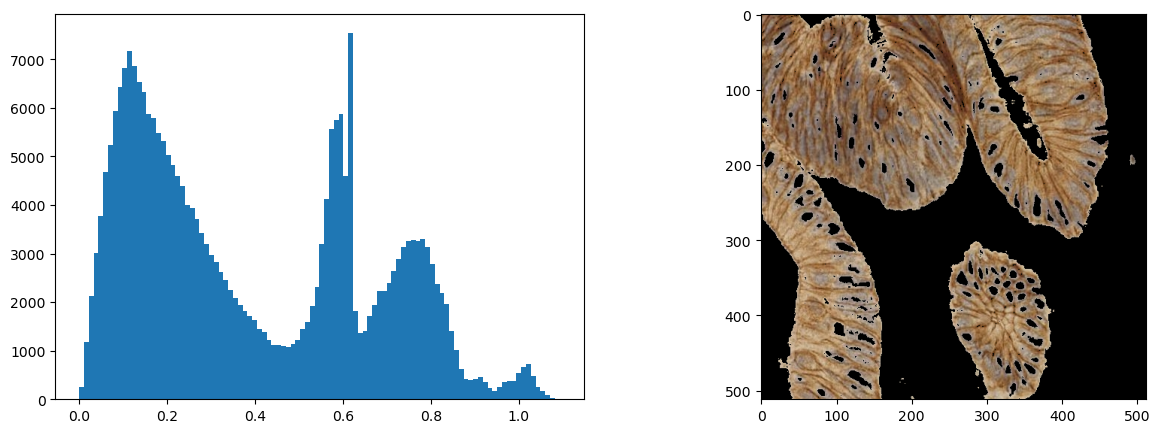

In [118]:
coords = [2, 2]
dmap = distance_color_space(hsv.astype('float'), coords)
plt.figure()
plt.imshow(dmap, cmap=plt.cm.jet)
plt.title('distance map in hsv color space')
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(dmap.flatten(), bins=100)
# shows that there is a clear distinction between the background and the foreground
# let's isolate the foreground with a treshold value of 0.4
mask = dmap < 0.4
im_m = im.copy()
im_m[mask == False] = 0
plt.subplot(1,2,2)
plt.imshow(im_m)
plt.show()

Let's create a magic wand

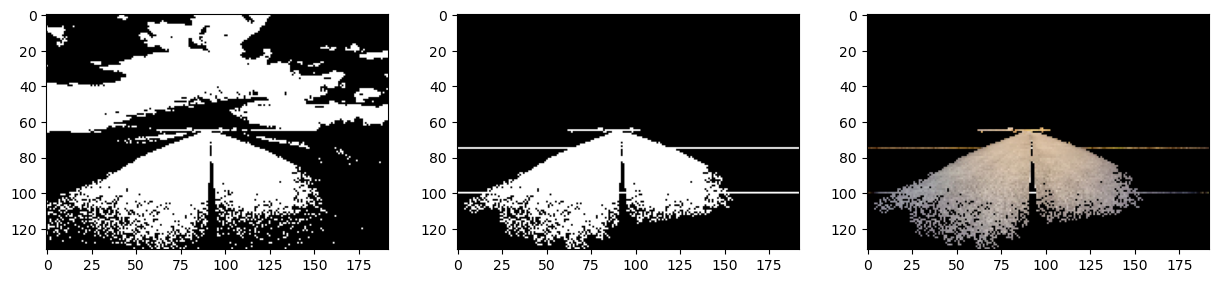

In [119]:
im = imread("road.jpg")[::5,::5]

def get_neighbours(coords):
    x = coords[1]
    y = coords[0]
    neighbours = [(y-1, x-1), (y-1, x), (y-1, x+1), (y, x-1), (y, x+1), (y+1, x-1), (y+1, x), (y+1, x+1)]
    return neighbours

coords = [100, 75]
tolerance = 0.25
dmap = distance_color_space(im.astype('float'), coords)
dmap /= dmap.max()
mask_tolerance = dmap < tolerance

mask_result = np.zeros(dmap.shape)
mask_result[coords] = True

candidates = get_neighbours(coords)

i = 0
visited = []
while(len(candidates) > 0):
    coords = candidates.pop(0)
    visited += [coords]
    i += 1
    # Check if it's a valid candidate
    if mask_tolerance[coords]:
        # Add its neighbours to the list of candidates
        new_candidates = get_neighbours(coords)
        for candidate in new_candidates:
            if candidate not in candidates and candidate not in visited and candidate[0] >= 0 and candidate[0] < im.shape[0] and candidate[1] >= 0 and candidate[1] < im.shape[1]:
                candidates += [candidate]
        # Add to the result mask
        mask_result[coords] = True

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(mask_tolerance)
plt.subplot(1,3,2)
plt.imshow(mask_result)
plt.subplot(1,3,3)
im_m = im.copy()
im_m[mask_result == False] = 0
plt.imshow(im_m)
plt.show() 

**Need more help? You can check the following videos:**

* [RGB vs HSV](https://www.youtube.com/watch?v=oVpSTZtZQNM&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=10)
* [Distances: image space and colour space](https://www.youtube.com/watch?v=f6aJJldc38E&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=11)
* [Creating a Magic Wand](https://www.youtube.com/watch?v=Aw--_cJ7o5I&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=12)

# Coding Project - Watermark

Write code to automatically add a watermark to a photograph.

<img src='ex_wm.jpg' width="500px" />

## Main requirements

The minimum requirements are to:
* Add the white pixels from the watermark somewhere in the photograph.
* Save the resulting image as an image file & display it in the notebook

You may use the *watermark.png* file available in the GitHub repository, or choose/create your own.

## Additional requirements

(note: this is not an exhaustive list, use your imagination!)

* Add an option to choose the watermark location
* Add transparency effect to the watermark
* Determine if the watermark should be dark or light based on the luminosity of the image
* ...


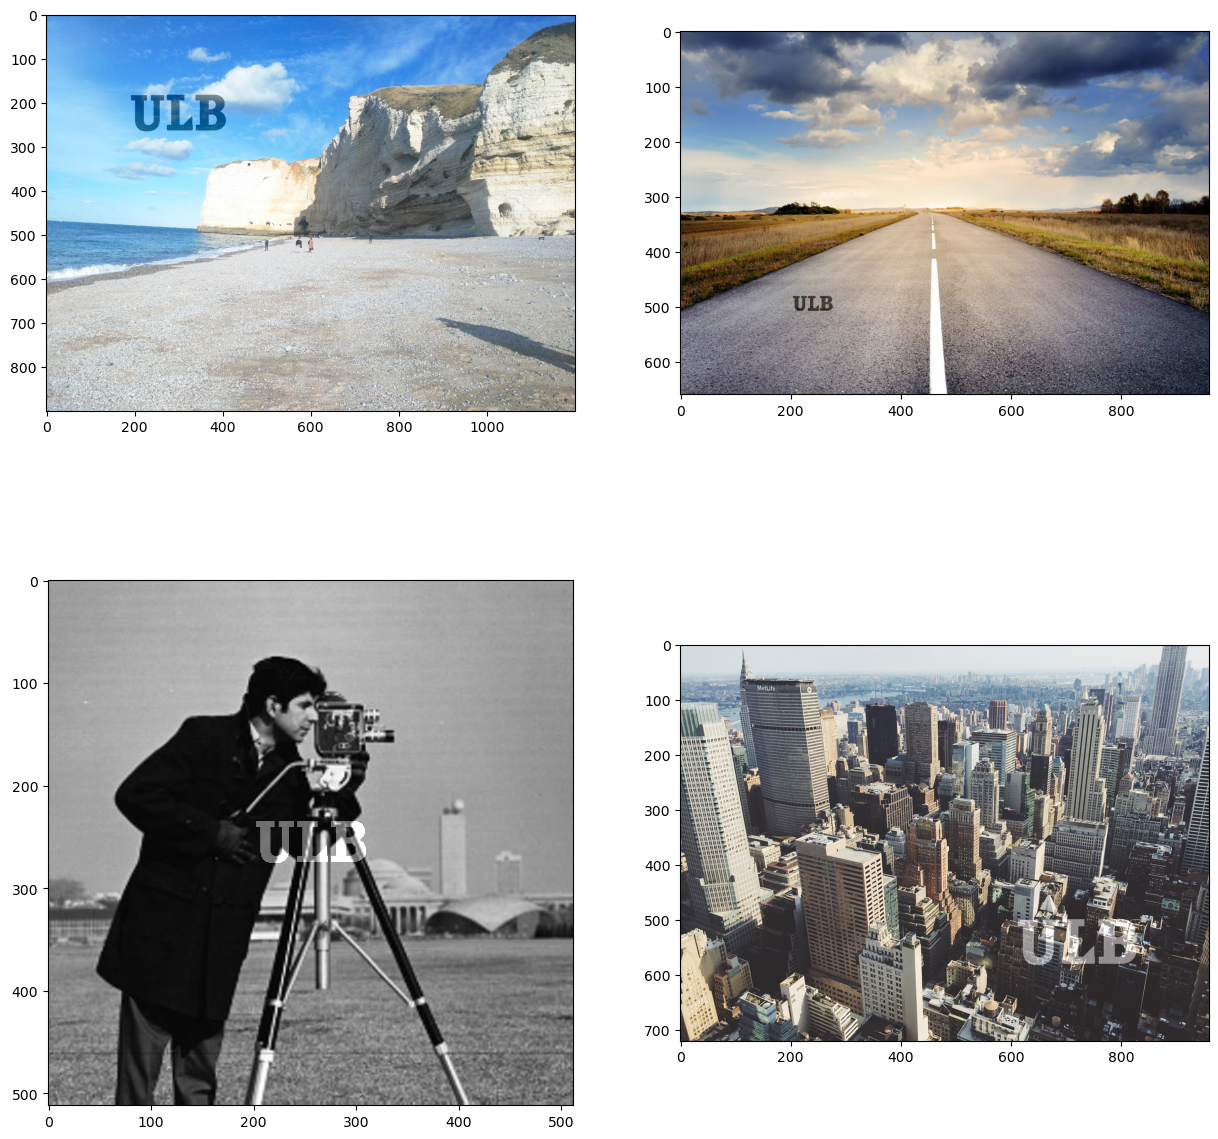

In [130]:
watermark = imread('watermark.png')

image_1 = imread('etretat.jpg')
image_2 = imread('road.jpg')
image_3 = imread('camera.jpg')
image_4 = imread('nyc.jpg')

def add_watermak(im, watermark, scale, coords, darkness):
    watermark = watermark.copy()
    index = 1//scale
    watermark = watermark[::int(index), ::int(index)]
    offset_x = round(coords[0]- watermark.shape[0]/2)
    offset_y = round(coords[1]- watermark.shape[1]/2)

    im_is_colored = len(im.shape) == 3

    local_hist = np.array(cum_hist(im[offset_x:offset_x+watermark.shape[0], offset_y:offset_y+watermark.shape[1]]))
    if im_is_colored:
        is_dark = watermark.shape[0]*watermark.shape[1]//2 < local_hist[128]//3
    else:
        is_dark = watermark.shape[0]*watermark.shape[1]//2 < local_hist[128]

    if is_dark:
        darkness = -darkness

    image = im.copy()

    for x in range(watermark.shape[0]):
        for y in range(watermark.shape[1]):
            if watermark[x][y].all() != 0:
                comp = 255 if is_dark else 0
                if im_is_colored:
                    for i in range(3):
                        value = image[offset_x + x, offset_y + y, i] - darkness
                        image[offset_x + x, offset_y + y, i] = value if (value < comp if is_dark else value > comp) else comp
                else:
                    value = image[offset_x + x, offset_y + y] - darkness
                    image[offset_x + x, offset_y + y] = value if (value < comp if is_dark else value > comp) else comp
    return image

coords1 = (image_1.shape[0]//4, image_1.shape[1]//4)
coords2 = (3*image_2.shape[0]//4, image_2.shape[1]//4)
coords3 = (image_3.shape[0]//2, image_3.shape[1]//2)
coords4 = (3*image_4.shape[0]//4, 3*image_4.shape[1]//4)

darkness = 100

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(add_watermak(image_1, watermark, 1, coords1, darkness))
plt.subplot(2,2,2)
plt.imshow(add_watermak(image_2, watermark, 0.3, coords2, darkness))
plt.subplot(2,2,3)
plt.imshow(add_watermak(image_3, watermark, 0.4, coords3, darkness))
plt.subplot(2,2,4)
plt.imshow(add_watermak(image_4, watermark, 0.9, coords4, darkness))
